# SWIGGY SALES ANALYSIS

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_excel(r"C:\analytics\data\swiggy_data.xlsx")
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


### Data Quality Checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


In [4]:
print("total no of rows:", df.shape[0])

total no of rows: 197430


In [5]:
print("total no of columns:", df.shape[1])

total no of columns: 10


In [6]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


In [7]:
df.duplicated().any()

np.True_

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(197403, 10)

In [10]:
df.isnull().sum()

State              0
City               0
Order Date         0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

In [15]:
 df = df.rename(columns={'Price (INR)':'Price'})

In [16]:
df.columns

Index(['State', 'City', 'Order Date', 'Restaurant Name', 'Location',
       'Category', 'Dish Name', 'Price', 'Rating', 'Rating Count'],
      dtype='object')

## KPI's

### Total Sales

In [17]:
print('total sales:',df['Price'].sum())

total sales: 53002984.47


### Average Rating

In [19]:
print('average rating:',df['Rating'].mean().round(2))

average rating: 4.34


### Average Order Value

In [20]:
print('average order value:', df['Price'].mean().round(2))

average order value: 268.5


### Ratings Count

In [21]:
print('ratings count:', df['Rating Count'].sum())

ratings count: 5591171


### Total Orders

In [24]:
print('total orders:', len(df))

total orders: 197403


## PROBLEM STATEMENT

### Monthly Sales Trend

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df['Month'] = df['Order Date'].dt.month

In [18]:
 df = df.rename(columns={'Price (INR)':'Price'})

In [19]:
df.columns

Index(['State', 'City', 'Order Date', 'Restaurant Name', 'Location',
       'Category', 'Dish Name', 'Price', 'Rating', 'Rating Count', 'Month'],
      dtype='object')

In [20]:
monthly_revenue = df.groupby("Month")["Price"].sum().reset_index()
monthly_revenue

,Month,Price
0,1,6823981.33
1,2,6268161.67
2,3,6572738.20
3,4,6590449.00
4,5,6792621.35
5,6,6513865.19
6,7,6650268.51
7,8,6790899.22


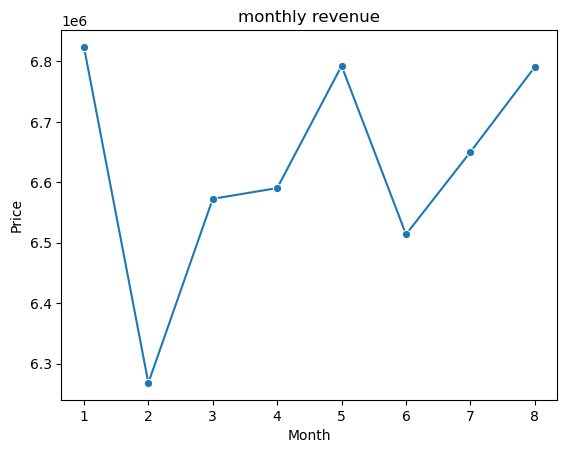

In [23]:
sns.lineplot(data=monthly_revenue, x="Month", y="Price", marker="o")
plt.title("monthly revenue")
plt.show()

## Top Performerce

### Top 10 Dishes by Rating

In [29]:
top_10_dishes = (
    df.groupby("Dish Name")["Rating"]
      .mean()
      .reset_index()
      .sort_values(by="Rating", ascending=False)
      .head(10)
)

In [30]:
top_10_dishes

,Dish Name,Rating
13876,Chili Chicken Full + 2pics Rumali Roti,5.0
20,African Peri Peri Spicy Fries,5.0
42467,Paprika Parmesan Straws,5.0
5233,Bikaneri Bhujia,5.0
46796,Rasmalai 8 Pcs,5.0
38066,Nadiyadi Mixture (200G),5.0
20816,Egg Curry (veg. Gravy ),5.0
20813,Egg Curry (2pcs) With Aaloo(300ml),5.0
54859,Tutty Frutty Cookie 250gm,5.0
20859,Egg Deluxe Thali,5.0


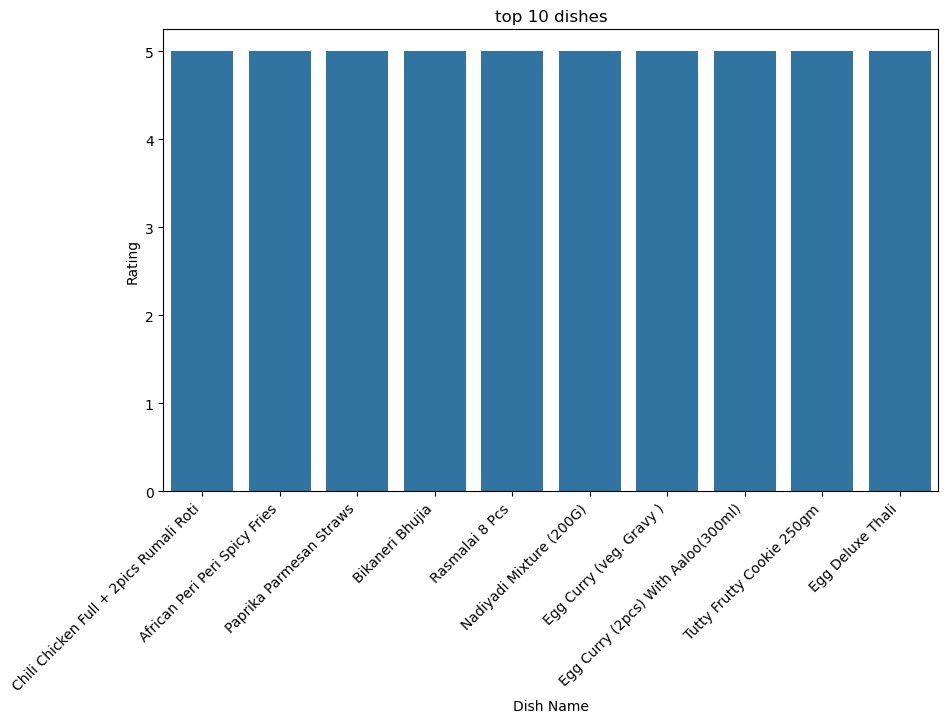

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_dishes, x="Dish Name", y="Rating")
plt.xticks(rotation=45, ha="right")
plt.title("top 10 dishes")
plt.show()

### Top 5 Cities by Sales

In [37]:
top_5_cities = (df.groupby('City')['Price'].sum().reset_index().sort_values(by='Price', ascending=False).head(5))

In [38]:
top_5_cities

,City,Price
3,Bengaluru,5455887.73
18,Lucknow,3117359.65
11,Hyderabad,3021711.62
19,Mumbai,3015573.35
20,New Delhi,2829180.60


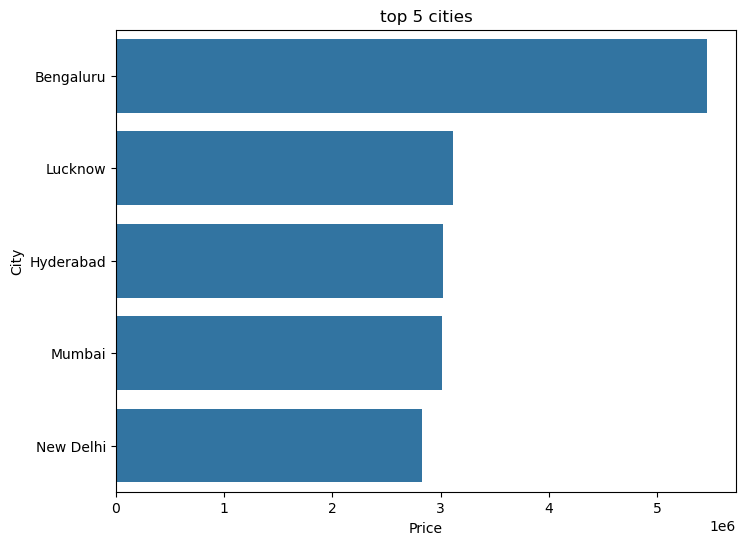

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_5_cities, x="Price", y="City")
plt.title("top 5 cities")
plt.show()

#### Swiggy Sales Dataset – Project Summary

In this project, the Swiggy sales dataset from Kaggle was analyzed to understand overall sales performance and customer preferences. Key performance indicators (KPIs) such as total revenue, total orders, average rating, and average order value were calculated to evaluate business health at a high level.

Monthly revenue analysis was performed to identify sales trends over time, highlighting periods of higher and lower demand. Top-performing dishes were identified by analyzing the top 10 dishes based on customer ratings, helping uncover popular menu items. Additionally, the top 5 cities by total sales were analyzed to determine the most profitable locations. Rating analysis was conducted to identify the top 10 ratings and understand customer feedback patterns.

To support these insights, multiple visualizations were created using Python libraries, including line charts, bar charts, and horizontal bar plots, making trends and comparisons easy to interpret. This project demonstrates practical skills in data cleaning, KPI calculation, aggregation, and data visualization for real-world business analysis.